This notebook is for creating figures for the HRS 23 poster. 

Figures are from Paper 1. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from hrs_23_figures import *

from sklearn import metrics

In [2]:
## Loading local data on csi20local
## Fibre strains

## N_case X N_regions X N_components
nonAF_fibre_ranges = np.zeros((17,6,2))
AF_fibre_ranges = np.zeros((12,6,2))

regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']
arch='endo_avg'
components=[0, 1]

localDataPath="/home/csi20local/Data/RG_CT_Cases"

## nonAF cases
for i in range(0, len(regions)):
    region = regions[i]
    
    for j in range(0,nonAF_fibre_ranges.shape[0]):    # case
        case = nonaf_cases[j]
            
        if case in f20_cases:
            filepath=f"{localDataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/percent_regional_strains"

        else:
            filepath=f'{localDataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9/percent_regional_strains'
            
        for k in range(0, len(components)):
            component = components[k]

            data = np.loadtxt(f"{filepath}/{arch}_f{component}_strainrange_{region}.txt")
            nonAF_fibre_ranges[j, i, k] = data

## AF cases
for i in range(0,len(regions)):     # region
    region = regions[i]
    
    for j in range(0,AF_fibre_ranges.shape[0]):    # case
        case = af_cases[j]
        
        if case in f20_cases:
            filepath=f"{localDataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/percent_regional_strains"

        else:
            filepath=f'{localDataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9/percent_regional_strains'
            
        for k in range(0, len(components)):
            component = components[k]
            
            data = np.loadtxt(f"{filepath}/{arch}_f{component}_strainrange_{region}.txt")
            AF_fibre_ranges[j, i, k] = data

In [3]:
regions

['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [4]:
nonAF_fibre_ranges.shape

(17, 6, 2)

In [5]:
nonAF_fibre_ranges[:, 0, 1].std()

7.678073229135858

In [6]:
AF_fibre_ranges[:, 0, 1].std()

3.698776063625704

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

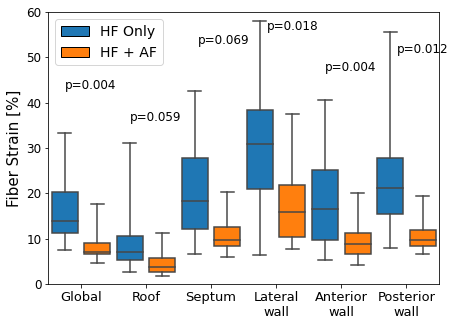

In [7]:
## Plotting

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,5), facecolor='white', sharey=True)

data_to_plot= [nonAF_fibre_ranges[:,0,component], AF_fibre_ranges[:,0,component],
               nonAF_fibre_ranges[:,1,component], AF_fibre_ranges[:,1,component],
               nonAF_fibre_ranges[:,2,component], AF_fibre_ranges[:,2,component],
               nonAF_fibre_ranges[:,3,component], AF_fibre_ranges[:,3,component],
               nonAF_fibre_ranges[:,4,component], AF_fibre_ranges[:,4,component],
               nonAF_fibre_ranges[:,5,component], AF_fibre_ranges[:,5,component]]

sns.boxplot(data=data_to_plot, orient='v', ax=ax1, whis=(0, 100))

regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']

ax1.set_ylabel(f"Fiber Strain [%]", fontsize=15)
ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
ax1.set_xticklabels(regions_axis, fontsize=13)
plt.ylim(0.0, 60)

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:orange')
    
## Calculate p values and plot
p_vals = np.zeros((6,))

for i in range(0, len(regions)):
    ## indexing as follows: p_vals; region; f1 component
    p_vals[i]=stats.ttest_ind(nonAF_fibre_ranges, AF_fibre_ranges)[-1][i][0]

## Plotting p_values
plt.text(0.0, 43, f'p={str(np.round(p_vals[0],3))}', size=12)
plt.text(2, 36, f'p={str(np.round(p_vals[1],3))}', size=12)
plt.text(4.1, 53, f'p={str(np.round(p_vals[2],3))}', size=12)
plt.text(6.2, 56, f'p={str(np.round(p_vals[3],3))}', size=12)
plt.text(8, 47, f'p={str(np.round(p_vals[4],3))}', size=12)
plt.text(10.2, 51, f'p={str(np.round(p_vals[5],3))}', size=12)

## horizontal lines
low_1=0.035
len_line=0.1

low_2=0.2
low_3=0.38
low_4=0.54
low_5=0.7
low_6=0.87

# plt.axhline(41, low_1,low_1+len_line, c='black', lw=1)
# plt.axhline(34, low_2,low_2+len_line, c='black', lw=1)
# plt.axhline(51, low_3,low_3+len_line, c='black', lw=1)
# plt.axhline(54, low_4,low_4+len_line, c='black', lw=1)
# plt.axhline(45, low_5,low_5+len_line, c='black', lw=1)
# plt.axhline(49, low_6,low_6+len_line, c='black', lw=1)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

plt.yticks(fontsize=12)

# sns.set_style("whitegrid")

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/boxplots_1_1_nolines_nopval.png", dpi=200, bbox_inches="tight")

## Figure 3

ROC plots

In [8]:
AF_fibre_ranges.shape

(12, 6, 2)

In [9]:
nonAF_fibre_ranges.shape

(17, 6, 2)

In [10]:
y_true = np.zeros((29, 6))
y_true[:len(nonaf_cases), :] = 1.0
y_true[len(nonaf_cases):, :] = 0.0

y_probs_fibres = np.zeros((29, 6, 2))
y_probs_fibres[:len(nonaf_cases), :, 0] = nonAF_fibre_ranges[:, :, 0] 
y_probs_fibres[len(nonaf_cases):, :, 0] = AF_fibre_ranges[:, :, 0]
y_probs_fibres[:len(nonaf_cases), :, 1] = nonAF_fibre_ranges[:, :, 1] 
y_probs_fibres[len(nonaf_cases):, :, 1] = AF_fibre_ranges[:, :, 1]

fpr_f1, tpr_f1, thresholds_f1 = metrics.roc_curve(y_true[:, 0], y_probs_fibres[:, 0, 0])
auc_f1 = metrics.roc_auc_score(y_true[:, 0], y_probs_fibres[:, 0, 0])

fpr_f2, tpr_f2, thresholds_f2 = metrics.roc_curve(y_true[:, 0], y_probs_fibres[:, 0, 1])
auc_f2 = metrics.roc_auc_score(y_true[:, 0], y_probs_fibres[:, 0, 1])

print("AUC fibres f1: ", auc_f1)
print("AUC fibres f2: ", auc_f2)

AUC fibres f1:  0.8578431372549019
AUC fibres f2:  0.8627450980392157


Text(0.5, 1.0, 'Cross-Fiber Strain')

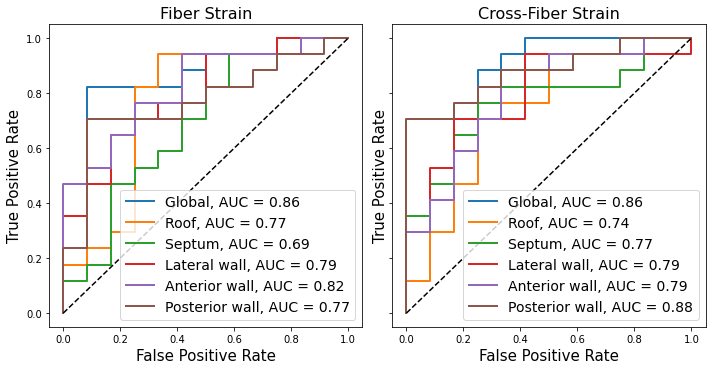

In [11]:
## Plotting all 6 lines on same plot

fig, ((ax2, ax3)) = plt.subplots(1,2,figsize=(10,5), facecolor='white', sharey=True)

regions_axis=['Global', 'Roof', 'Septum', 'Lateral wall', 'Anterior wall', 'Posterior wall']

for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_probs_fibres[:, i, 0])
    auc = metrics.roc_auc_score(y_true[:, i], y_probs_fibres[:, i, 0])
    
    ax2.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')
    
for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_probs_fibres[:, i, 1])
    auc = metrics.roc_auc_score(y_true[:, i], y_probs_fibres[:, i, 1])
    
    ax3.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')

for i in range(0, len(fig.axes)):
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
    fig.axes[i].set_xlabel("False Positive Rate", fontsize=15)
    fig.axes[i].set_ylabel("True Positive Rate", fontsize=15)
    fig.axes[i].legend(fontsize=14)
    
plt.tight_layout()

ax2.set_title("Fiber Strain", fontsize=16)
ax3.set_title("Cross-Fiber Strain", fontsize=16)

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5, shuffle=False)
kf_strat = StratifiedKFold(n_splits=5, shuffle=False)

## Want to use straitifed kfold as want roughly same proportion of AF and nonAF in each fold

## use indices for train and test splits to create pred and true arrays for each fold
## calculate auc for each fold
## calculate roc values for each fold
## use this to calculate mean, std of AUC
## Use this to calculate mean ROC curve coordiantes

In [13]:
all_cases = nonaf_cases + af_cases

In [14]:
af_naf_classes = np.zeros((len(all_cases),))
af_naf_classes[:17] = 0.0
af_naf_classes[17:] = 1.0

In [15]:
kf_strat_split = kf_strat.split(all_cases, af_naf_classes)

In [16]:
kf_strat_split_inst = next(kf_strat_split)

training_list = [all_cases[i] for i in kf_strat_split_inst[0]]
val_list = [all_cases[i] for i in kf_strat_split_inst[1]]

In [17]:
all_fibre_ranges = np.concatenate((nonAF_fibre_ranges, AF_fibre_ranges))

In [18]:
from sklearn.metrics import auc

## Populate y_true and y_pred labels using ALL data
y_true = np.zeros((29, 6))
y_true[:len(nonaf_cases), :] = 1.0
y_true[len(nonaf_cases):, :] = 0.0

y_probs_fibres = np.zeros((29, 6, 2))
y_probs_fibres[:len(nonaf_cases), :, 0] = nonAF_fibre_ranges[:, :, 0] 
y_probs_fibres[len(nonaf_cases):, :, 0] = AF_fibre_ranges[:, :, 0]
y_probs_fibres[:len(nonaf_cases), :, 1] = nonAF_fibre_ranges[:, :, 1] 
y_probs_fibres[len(nonaf_cases):, :, 1] = AF_fibre_ranges[:, :, 1]

## Initialise results arrays

## Shape: K_folds X regions
fibre_f1_auc = np.zeros((5,6))
fibre_f2_auc = np.zeros((5,6))

## Interpolate TPRs 
## Fold X Interpolated size X Region
tprs_f1 = np.zeros((5, 100, 6))
tprs_f2 = np.zeros((5, 100, 6))

mean_fpr = np.linspace(0, 1, 100)

for i, (train_index, test_index) in enumerate(kf_strat.split(all_cases, af_naf_classes)):
    print(f"Fold {i}:")
    
    ## Create pred and true arrays for fold
    y_true_fold = np.take(y_true, train_index, axis=0)
    
    y_probs_fibres_fold = np.take(y_probs_fibres, train_index, axis=0) 
    
    ## Calculate ROC scores
    
    ## iterate over all regions
    for j in range(0, 6):
        
        ## Fiber strains
        fpr_f1, tpr_f1, thresholds_f1 = metrics.roc_curve(y_true_fold[:, j], y_probs_fibres_fold[:, j, 0])
        auc_f1 = metrics.roc_auc_score(y_true_fold[:, j], y_probs_fibres_fold[:, j, 0])
        fibre_f1_auc[i, j] = auc_f1
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_f1, tpr_f1)
        interp_tpr[0] = 0.0
        tprs_f1[i, :, j] = interp_tpr

        ## Cross-fiber strains
        fpr_f2, tpr_f2, thresholds_f2 = metrics.roc_curve(y_true_fold[:, j], y_probs_fibres_fold[:, j, 1])
        auc_f2 = metrics.roc_auc_score(y_true_fold[:, j], y_probs_fibres_fold[:, j, 1])
        fibre_f2_auc[i, j] = auc_f2
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_f2, tpr_f2)
        interp_tpr[0] = 0.0
        tprs_f2[i, :, j] = interp_tpr
    
## Calculate mean tpr over folds

mean_tpr_f1 = np.mean(tprs_f1, axis=0)
mean_tpr_f2 = np.mean(tprs_f2, axis=0)

## Set final coordinate as 1

mean_tpr_f1[-1, :] = 1.0
mean_tpr_f2[-1, :] = 1.0

mean_auc_f1 = np.mean(fibre_f1_auc, axis=0)
mean_auc_f2 = np.mean(fibre_f2_auc, axis=0)

std_auc_f1 = np.std(fibre_f1_auc, axis=0)
std_auc_f2 = np.std(fibre_f2_auc, axis=0)

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


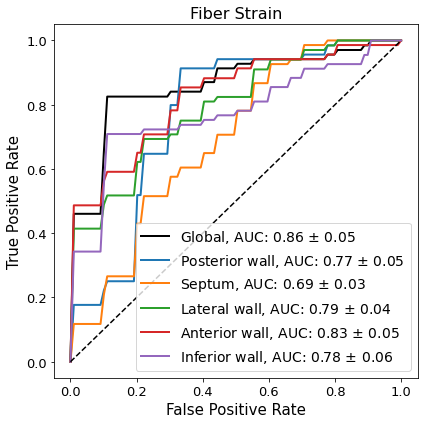

In [19]:
fig, ((ax2)) = plt.subplots(1,1,figsize=(6,6), facecolor='white', sharey=True)

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']

ax2.plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=2, 
         color='black')    

for i in range(1, len(regions)):
    ax2.plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=2)
    
for i in range(0, len(fig.axes[:])):
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
    fig.axes[i].tick_params(axis='both', labelsize=13)

fig.axes[0].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[0].set_xlabel("False Positive Rate", fontsize=15)

for i in range(0, len(fig.axes[:])):
    fig.axes[i].legend(fontsize=14, loc='lower right')

ax2.set_title("Fiber Strain", fontsize=16)
plt.tight_layout()

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/roc_curves_cval_SAN_blackglobal.png", dpi=200, bbox_inches="tight")

## Poster Fig

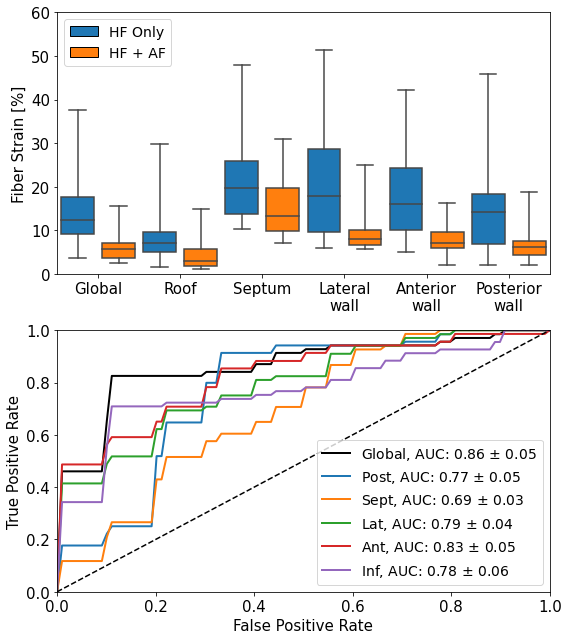

In [24]:
fig, ((ax1), (ax2)) = plt.subplots(2,1,figsize=(8,9), facecolor='white')

## Plotting

component=0
data_to_plot= [nonAF_fibre_ranges[:,0,component], AF_fibre_ranges[:,0,component],
               nonAF_fibre_ranges[:,1,component], AF_fibre_ranges[:,1,component],
               nonAF_fibre_ranges[:,2,component], AF_fibre_ranges[:,2,component],
               nonAF_fibre_ranges[:,3,component], AF_fibre_ranges[:,3,component],
               nonAF_fibre_ranges[:,4,component], AF_fibre_ranges[:,4,component],
               nonAF_fibre_ranges[:,5,component], AF_fibre_ranges[:,5,component]]

sns.boxplot(data=data_to_plot, orient='v', ax=ax1, whis=(0, 100))

regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']

ax1.set_ylabel(f"Fiber Strain [%]", fontsize=15)
ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
ax1.set_xticklabels(regions_axis, fontsize=15)
ax1.set_ylim(0.0, 60)
ax1.set_yticks(ticks=np.arange(0,70,10))
ax1.set_yticklabels(np.arange(0,70,10), fontsize=15)

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:orange')
    

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

########### Second plot

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']
regions_axis_2=['Global', 'Post', 'Sept', 'Lat', 'Ant', 'Inf']

ax2.plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis_2[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=2, 
         color='black')    

for i in range(1, len(regions)):
    ax2.plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis_2[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=2)

ax2.set_ylim(0.0, 1.0)
ax2.set_xlim(0.0, 1.0)

for i in range(1, 2):
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
    fig.axes[i].tick_params(axis='both', labelsize=15)

fig.axes[1].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[1].set_xlabel("False Positive Rate", fontsize=15)

for i in range(1, 2):
    fig.axes[i].legend(fontsize=14, loc='lower right')

# ax2.set_title("Fiber Strain", fontsize=16)
plt.tight_layout()

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/HRS23/Poster/merged_plots_v3.svg", dpi=200, bbox_inches="tight")

In [25]:
## Load LAEF

nAF_LA_EF = np.zeros((len(nonaf_cases),))
AF_LA_EF = np.zeros((len(af_cases),))

# basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
# basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"
basePath="/home/csi20local/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)):
    nAF_LA_EF[i] = np.loadtxt(f"{basePath}/{nonaf_cases[i]}/multilabel_seg_analysis/LA_EF.txt")
    
for i in range(0, len(af_cases)):
    AF_LA_EF[i] = np.loadtxt(f"{basePath}/{af_cases[i]}/multilabel_seg_analysis/LA_EF.txt")

In [26]:
## Load LVEF

nAF_LV_EF = np.zeros((len(nonaf_cases),))
AF_LV_EF = np.zeros((len(af_cases),))

## append data

# basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
# basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"
basePath="/home/csi20local/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)):
    nAF_LV_EF[i] = np.loadtxt(f"{basePath}/{nonaf_cases[i]}/multilabel_seg_analysis/LV_EF.txt")
    
for i in range(0, len(af_cases)):
    AF_LV_EF[i] = np.loadtxt(f"{basePath}/{af_cases[i]}/multilabel_seg_analysis/LV_EF.txt")

Ttest_indResult(statistic=0.21566136076274375, pvalue=0.830872631368488)


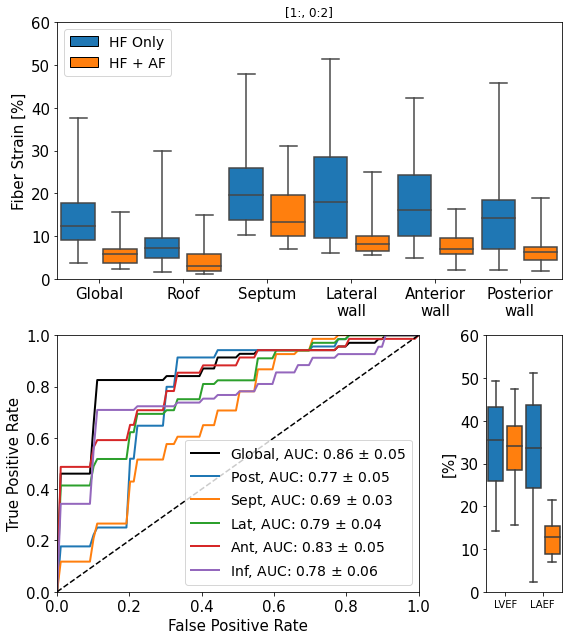

In [27]:
fig = plt.figure(figsize=(8, 9), facecolor='white')

ax = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(ax[0:2, 0:4])
fig.axes[0].set_title('[0, 0:3]')
ax1 = fig.add_subplot(ax[2:, 3])
fig.axes[0].set_title('[0:, -1]')
ax1 = fig.add_subplot(ax[2:, 0:3])
fig.axes[0].set_title('[1:, 0:2]')

fig.axes[:]

#### strain boxplots
### axes[0]

component=0
data_to_plot= [nonAF_fibre_ranges[:,0,component], AF_fibre_ranges[:,0,component],
               nonAF_fibre_ranges[:,1,component], AF_fibre_ranges[:,1,component],
               nonAF_fibre_ranges[:,2,component], AF_fibre_ranges[:,2,component],
               nonAF_fibre_ranges[:,3,component], AF_fibre_ranges[:,3,component],
               nonAF_fibre_ranges[:,4,component], AF_fibre_ranges[:,4,component],
               nonAF_fibre_ranges[:,5,component], AF_fibre_ranges[:,5,component]]

sns.boxplot(data=data_to_plot, orient='v', ax=fig.axes[0], whis=(0, 100))

regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']

fig.axes[0].set_ylabel(f"Fiber Strain [%]", fontsize=15)
fig.axes[0].set_xticks(ticks=np.arange(0.5,11.5,2))
fig.axes[0].set_xticklabels(regions_axis, fontsize=15)
fig.axes[0].set_ylim(0.0, 60)
fig.axes[0].set_yticks(ticks=np.arange(0,70,10))
fig.axes[0].set_yticklabels(np.arange(0,70,10), fontsize=15)

for i in range(0, 12, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:orange')
    

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
fig.axes[0].legend(handles=legend_elements, loc='upper left', fontsize=14)

## AUC curves
## axes[2]

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']
regions_axis_2=['Global', 'Post', 'Sept', 'Lat', 'Ant', 'Inf']

fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis_2[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=2, 
         color='black')    

for i in range(1, len(regions)):
    fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis_2[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=2)

fig.axes[2].set_ylim(0.0, 1.0)
fig.axes[2].set_xlim(0.0, 1.0)

fig.axes[2].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
fig.axes[2].tick_params(axis='both', labelsize=15)

fig.axes[2].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[2].set_xlabel("False Positive Rate", fontsize=15)
fig.axes[2].legend(fontsize=14, loc='lower right')

## LVEF and LAEF boxplots
## axes[1]

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF, nAF_LA_EF, AF_LA_EF], ax=fig.axes[1], orient='v')
fig.axes[1].set_ylabel("[%]", fontsize=15)
fig.axes[1].set_xticks(np.arange(0.5, 4, 2), ['LVEF', 'LAEF'], fontsize=10)
fig.axes[1].tick_params(axis='y', labelsize=15)

for i in range(0, 4, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 5, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:orange')

# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_EF, AF_LV_EF))
pval = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
# plt.text(0.20, 53, f'p = {str(np.round(pval,3))}', size=15)

# fig.axes[1].set_yticks(fontsize=15)
fig.axes[1].set_ylim(0,60.0)

plt.tight_layout()


Ttest_indResult(statistic=0.21566136076274375, pvalue=0.830872631368488)


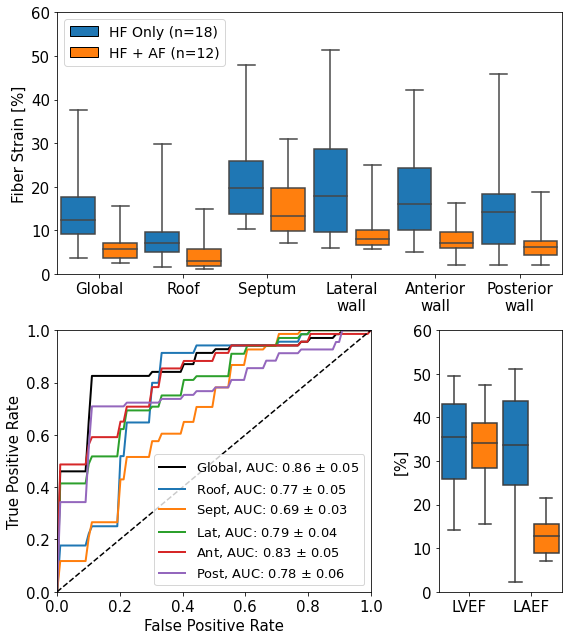

In [28]:
fig = plt.figure(figsize=(8, 9), facecolor='white')

ax = fig.add_gridspec(6, 6)
ax1 = fig.add_subplot(ax[0:3, 0:6])
# fig.axes[0].set_title('[0, 0:3]')
ax1 = fig.add_subplot(ax[3:, 4:6])
# fig.axes[0].set_title('[0:, -1]')
ax1 = fig.add_subplot(ax[3:, 0:4])
# fig.axes[0].set_title('[1:, 0:2]')

fig.axes[:]

#### strain boxplots
### axes[0]

component=0
data_to_plot= [nonAF_fibre_ranges[:,0,component], AF_fibre_ranges[:,0,component],
               nonAF_fibre_ranges[:,1,component], AF_fibre_ranges[:,1,component],
               nonAF_fibre_ranges[:,2,component], AF_fibre_ranges[:,2,component],
               nonAF_fibre_ranges[:,3,component], AF_fibre_ranges[:,3,component],
               nonAF_fibre_ranges[:,4,component], AF_fibre_ranges[:,4,component],
               nonAF_fibre_ranges[:,5,component], AF_fibre_ranges[:,5,component]]

sns.boxplot(data=data_to_plot, orient='v', ax=fig.axes[0], whis=(0, 100))

regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']

fig.axes[0].set_ylabel(f"Fiber Strain [%]", fontsize=15)
fig.axes[0].set_xticks(ticks=np.arange(0.5,11.5,2))
fig.axes[0].set_xticklabels(regions_axis, fontsize=15)
fig.axes[0].set_ylim(0.0, 60)
fig.axes[0].set_yticks(ticks=np.arange(0,70,10))
fig.axes[0].set_yticklabels(np.arange(0,70,10), fontsize=15)

for i in range(0, 12, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:orange')
    

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only (n=18)'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF (n=12)')]
fig.axes[0].legend(handles=legend_elements, loc='upper left', fontsize=14)

## AUC curves
## axes[2]

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']
regions_axis_2=['Global', 'Roof', 'Sept', 'Lat', 'Ant', 'Post']

fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis_2[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=2, 
         color='black')    

for i in range(1, len(regions)):
    fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis_2[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=2)

fig.axes[2].set_ylim(0.0, 1.0)
fig.axes[2].set_xlim(0.0, 1.0)

fig.axes[2].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
fig.axes[2].tick_params(axis='both', labelsize=15)

fig.axes[2].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[2].set_xlabel("False Positive Rate", fontsize=15)
fig.axes[2].legend(fontsize=13, loc='lower right')
# fig.axes[2].legend(fontsize=14, bbox_to_anchor=(0.5, 0.8)) #loc='lower right')

## LVEF and LAEF boxplots
## axes[1]

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF, nAF_LA_EF, AF_LA_EF], ax=fig.axes[1], orient='v')
fig.axes[1].set_ylabel("[%]", fontsize=15)
fig.axes[1].set_xticks(np.arange(0.5, 4, 2), ['LVEF', 'LAEF'], fontsize=15)
fig.axes[1].tick_params(axis='y', labelsize=15)

for i in range(0, 4, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 5, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:orange')

# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_EF, AF_LV_EF))
pval = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
# plt.text(0.20, 53, f'p = {str(np.round(pval,3))}', size=15)

# fig.axes[1].set_yticks(fontsize=15)
fig.axes[1].set_ylim(0,60.0)

plt.tight_layout()
# fig.tight_layout(pad=1)

# plt.subplot_tool()
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/HRS23/Poster/merged_plots_EF_v2.svg", dpi=200, bbox_inches="tight")

Ttest_indResult(statistic=0.21566136076274375, pvalue=0.830872631368488)


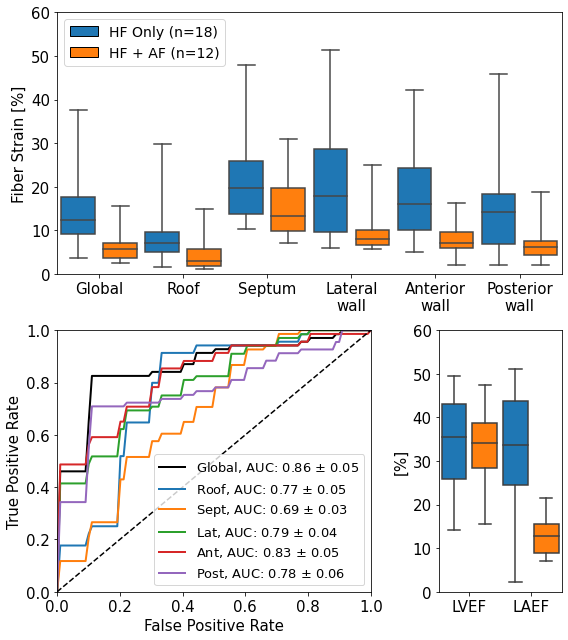

In [29]:
fig = plt.figure(figsize=(8, 9))

ax = fig.add_gridspec(6, 6)
ax1 = fig.add_subplot(ax[0:3, 0:6])
# fig.axes[0].set_title('[0, 0:3]')
ax1 = fig.add_subplot(ax[3:, 4:6])
# fig.axes[0].set_title('[0:, -1]')
ax1 = fig.add_subplot(ax[3:, 0:4])
# fig.axes[0].set_title('[1:, 0:2]')

fig.axes[:]

#### strain boxplots
### axes[0]

component=0
data_to_plot= [nonAF_fibre_ranges[:,0,component], AF_fibre_ranges[:,0,component],
               nonAF_fibre_ranges[:,1,component], AF_fibre_ranges[:,1,component],
               nonAF_fibre_ranges[:,2,component], AF_fibre_ranges[:,2,component],
               nonAF_fibre_ranges[:,3,component], AF_fibre_ranges[:,3,component],
               nonAF_fibre_ranges[:,4,component], AF_fibre_ranges[:,4,component],
               nonAF_fibre_ranges[:,5,component], AF_fibre_ranges[:,5,component]]

sns.boxplot(data=data_to_plot, orient='v', ax=fig.axes[0], whis=(0, 100))

regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']

fig.axes[0].set_ylabel(f"Fiber Strain [%]", fontsize=15)
fig.axes[0].set_xticks(ticks=np.arange(0.5,11.5,2))
fig.axes[0].set_xticklabels(regions_axis, fontsize=15)
fig.axes[0].set_ylim(0.0, 60)
fig.axes[0].set_yticks(ticks=np.arange(0,70,10))
fig.axes[0].set_yticklabels(np.arange(0,70,10), fontsize=15)

for i in range(0, 12, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:orange')
    

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only (n=18)'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF (n=12)')]
fig.axes[0].legend(handles=legend_elements, loc='upper left', fontsize=14)

## AUC curves
## axes[2]

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']
regions_axis_2=['Global', 'Roof', 'Sept', 'Lat', 'Ant', 'Post']

fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis_2[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=2, 
         color='black')    

for i in range(1, len(regions)):
    fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis_2[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=2)

fig.axes[2].set_ylim(0.0, 1.0)
fig.axes[2].set_xlim(0.0, 1.0)

fig.axes[2].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
fig.axes[2].tick_params(axis='both', labelsize=15)

fig.axes[2].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[2].set_xlabel("False Positive Rate", fontsize=15)
fig.axes[2].legend(fontsize=13, loc='lower right')
# fig.axes[2].legend(fontsize=14, bbox_to_anchor=(0.5, 0.8)) #loc='lower right')

## LVEF and LAEF boxplots
## axes[1]

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF, nAF_LA_EF, AF_LA_EF], ax=fig.axes[1], orient='v')
fig.axes[1].set_ylabel("[%]", fontsize=15)
fig.axes[1].set_xticks(np.arange(0.5, 4, 2), ['LVEF', 'LAEF'], fontsize=15)
fig.axes[1].tick_params(axis='y', labelsize=15)

for i in range(0, 4, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 5, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:orange')

# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_EF, AF_LV_EF))
pval = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
# plt.text(0.20, 53, f'p = {str(np.round(pval,3))}', size=15)

# fig.axes[1].set_yticks(fontsize=15)
fig.axes[1].set_ylim(0,60.0)

plt.tight_layout()
# fig.tight_layout(pad=1)

# plt.subplot_tool()
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/HRS23/Poster/merged_plots_EF_v2_trans.svg", dpi=200, bbox_inches="tight")

Ttest_indResult(statistic=0.21566136076274375, pvalue=0.830872631368488)


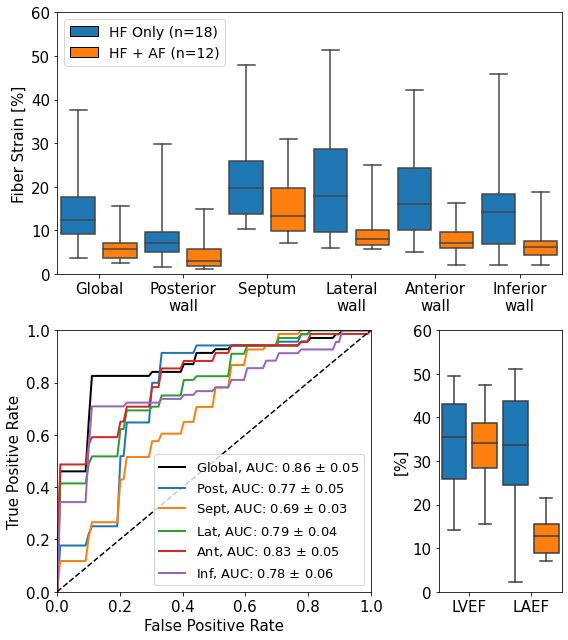

In [33]:
fig = plt.figure(figsize=(8, 9))

ax = fig.add_gridspec(6, 6)
ax1 = fig.add_subplot(ax[0:3, 0:6])
# fig.axes[0].set_title('[0, 0:3]')
ax1 = fig.add_subplot(ax[3:, 4:6])
# fig.axes[0].set_title('[0:, -1]')
ax1 = fig.add_subplot(ax[3:, 0:4])
# fig.axes[0].set_title('[1:, 0:2]')

fig.axes[:]

#### strain boxplots
### axes[0]

component=0
data_to_plot= [nonAF_fibre_ranges[:,0,component], AF_fibre_ranges[:,0,component],
               nonAF_fibre_ranges[:,1,component], AF_fibre_ranges[:,1,component],
               nonAF_fibre_ranges[:,2,component], AF_fibre_ranges[:,2,component],
               nonAF_fibre_ranges[:,3,component], AF_fibre_ranges[:,3,component],
               nonAF_fibre_ranges[:,4,component], AF_fibre_ranges[:,4,component],
               nonAF_fibre_ranges[:,5,component], AF_fibre_ranges[:,5,component]]

sns.boxplot(data=data_to_plot, orient='v', ax=fig.axes[0], whis=(0, 100))

regions_axis=['Global', 'Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

fig.axes[0].set_ylabel(f"Fiber Strain [%]", fontsize=15)
fig.axes[0].set_xticks(ticks=np.arange(0.5,11.5,2))
fig.axes[0].set_xticklabels(regions_axis, fontsize=15)
fig.axes[0].set_ylim(0.0, 60)
fig.axes[0].set_yticks(ticks=np.arange(0,70,10))
fig.axes[0].set_yticklabels(np.arange(0,70,10), fontsize=15)

for i in range(0, 12, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = fig.axes[0].patches[i]
    mybox.set_facecolor('tab:orange')
    

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only (n=18)'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF (n=12)')]
fig.axes[0].legend(handles=legend_elements, loc='upper left', fontsize=14)

## AUC curves
## axes[2]

# regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']
regions_axis_2=['Global', 'Post', 'Sept', 'Lat', 'Ant', 'Inf']

fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis_2[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=2, 
         color='black')    

for i in range(1, len(regions)):
    fig.axes[2].plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis_2[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=2)

fig.axes[2].set_ylim(0.0, 1.0)
fig.axes[2].set_xlim(0.0, 1.0)

fig.axes[2].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
fig.axes[2].tick_params(axis='both', labelsize=15)

fig.axes[2].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[2].set_xlabel("False Positive Rate", fontsize=15)
fig.axes[2].legend(fontsize=13, loc='lower right')
# fig.axes[2].legend(fontsize=14, bbox_to_anchor=(0.5, 0.8)) #loc='lower right')

## LVEF and LAEF boxplots
## axes[1]

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF, nAF_LA_EF, AF_LA_EF], ax=fig.axes[1], orient='v')
fig.axes[1].set_ylabel("[%]", fontsize=15)
fig.axes[1].set_xticks(np.arange(0.5, 4, 2), ['LVEF', 'LAEF'], fontsize=15)
fig.axes[1].tick_params(axis='y', labelsize=15)

for i in range(0, 4, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 5, 2):
    mybox = fig.axes[1].patches[i]
    mybox.set_facecolor('tab:orange')

# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_EF, AF_LV_EF))
pval = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
# plt.text(0.20, 53, f'p = {str(np.round(pval,3))}', size=15)

# fig.axes[1].set_yticks(fontsize=15)
fig.axes[1].set_ylim(0,60.0)

plt.tight_layout()
# fig.tight_layout(pad=1)

# plt.subplot_tool()
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/HRS23/Poster/merged_plots_EF_v2_trans_AnatLabels.svg", dpi=200, bbox_inches="tight")